<a href="https://colab.research.google.com/github/krishna09062001/DS_excelr-python-basics/blob/main/Multi_Linear_Regression_50_Startups_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
Startup = pd.read_csv("50_Startups.csv")
Startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
Startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
Startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
Startup.drop("State", axis = 1)

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [ ]:
Startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


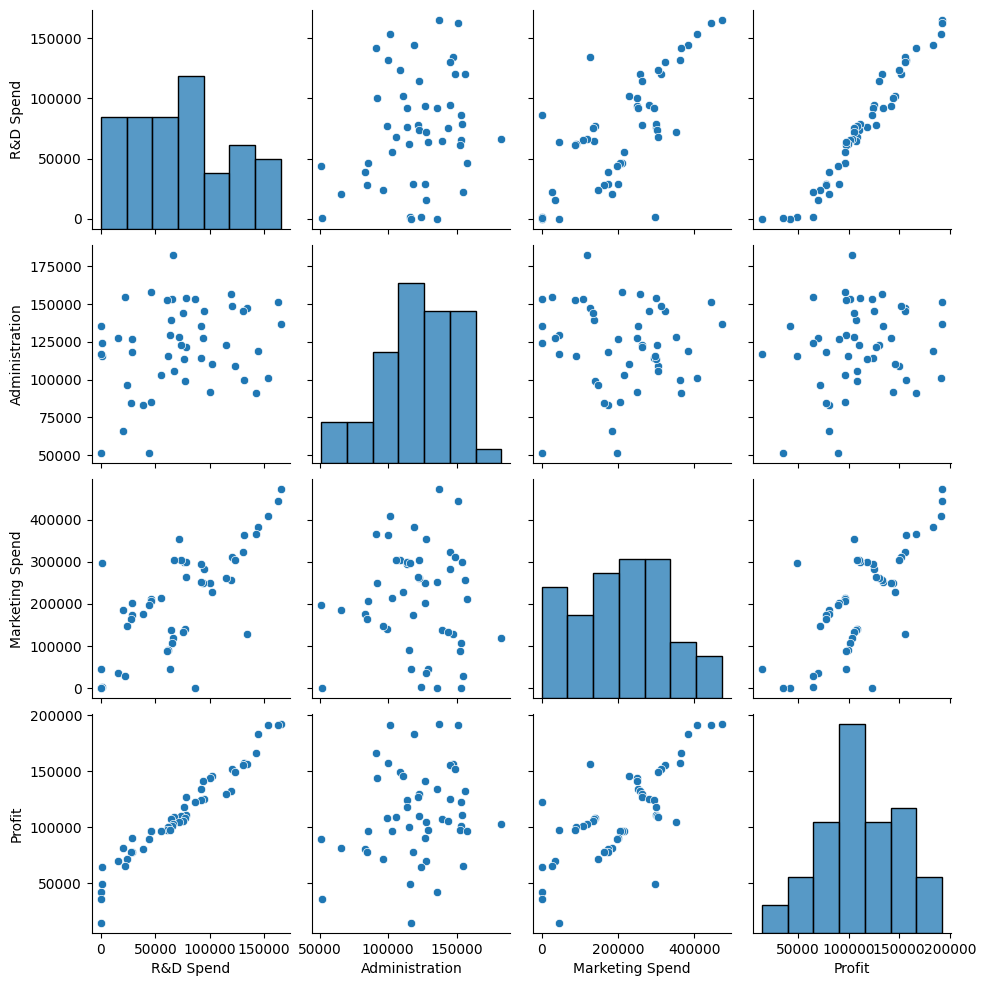

In [ ]:
sns.pairplot(Startup)

<Axes: >

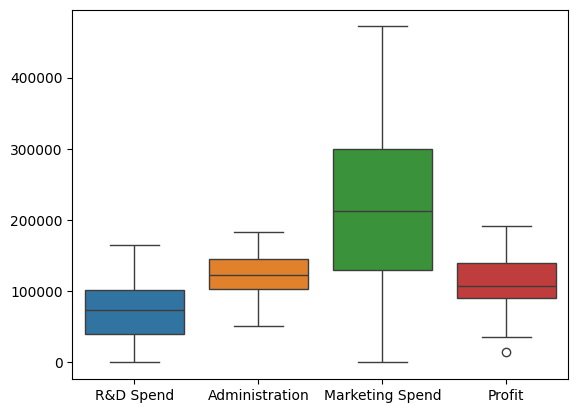

In [ ]:
sns.boxplot(Startup)

In [ ]:
Startups = Startup.drop("State", axis=1)
Startups = Startups.apply(pd.to_numeric)
Q1 = Startups.quantile(0.25)

Q3 = Startups.quantile(0.75)

IQR = Q3 - Q1

Startups = Startups[~((Startups < (Q1 - 1.5 * IQR)) | (Startups > (Q3 + 1.5 * IQR))).any(axis=1)]

Startups.shape

(49, 4)

<Axes: >

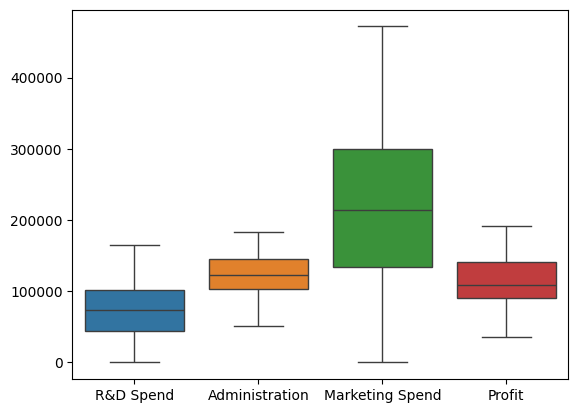

In [ ]:
sns.boxplot(Startups)

In [ ]:
Startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.243438,0.711654,0.978437
Administration,0.243438,1.000000,-0.037280,0.205841
Marketing Spend,0.711654,-0.037280,1.000000,0.739307
Profit,0.978437,0.205841,0.739307,1.000000


In [ ]:
Startups.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [ ]:
Startups.rename(columns={'R&D Spend': 'RDSpend'}, inplace=True)
Startups.rename(columns={'Marketing Spend': 'MarketingSpend'}, inplace=True)
model = smf.ols('Profit ~ RDSpend + Administration + MarketingSpend', Startups).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           8.85e-32
Time:                        19:34:51   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDSpend            0.7830      0.038     20.470      0.000       0.706       0.860
Administration    -0.0222      0.043     -0.518      0.607      -0.109       0.064
MarketingSpend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model.params

Intercept         52382.439251
RDSpend               0.783002
Administration       -0.022201
MarketingSpend        0.025234
dtype: float64

In [ ]:
print(model.tvalues, '\n', model.pvalues)

Intercept          9.450782
RDSpend           20.469501
Administration    -0.517889
MarketingSpend     1.825383
dtype: float64 
 Intercept         2.960000e-12
RDSpend           1.971077e-24
Administration    6.070728e-01
MarketingSpend    7.458443e-02
dtype: float64


In [ ]:
model.rsquared , model.rsquared_adj

(0.9613162435129847, 0.9587373264138503)

In [ ]:
ml_a = smf.ols("Profit~Administration", Startups).fit()
ml_a.tvalues , ml_a.pvalues

(Intercept         3.346236
 Administration    1.442053
 dtype: float64,
 Intercept         0.001618
 Administration    0.155918
 dtype: float64)

In [ ]:
ml_m=smf.ols("Profit~MarketingSpend", Startups).fit()
ml_m.tvalues , ml_m.pvalues

(Intercept         8.427541
 MarketingSpend    7.526983
 dtype: float64,
 Intercept         5.905020e-11
 MarketingSpend    1.304853e-09
 dtype: float64)

In [ ]:
ml_am =smf.ols("Profit~Administration+MarketingSpend", Startups).fit()
ml_am.tvalues , ml_am.pvalues

(Intercept         1.474103
 Administration    2.508234
 MarketingSpend    8.027366
 dtype: float64,
 Intercept         1.472650e-01
 Administration    1.572324e-02
 MarketingSpend    2.695219e-10
 dtype: float64)

In [ ]:
rsq_r=smf.ols("RDSpend~Administration+MarketingSpend", Startups).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("Administration~RDSpend+MarketingSpend", Startups).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MarketingSpend~RDSpend+Administration",Startups).fit().rsquared
vif_m=1/(1-rsq_m)


d1={'Variables':['RDSpend','Administration','MarketingSpend'],'Vif':[vif_r,vif_a,vif_m]}
Vif_S=pd.DataFrame(d1)
Vif_S

,Variables,Vif
0,RDSpend,2.377754
1,Administration,1.175172
2,MarketingSpend,2.239957


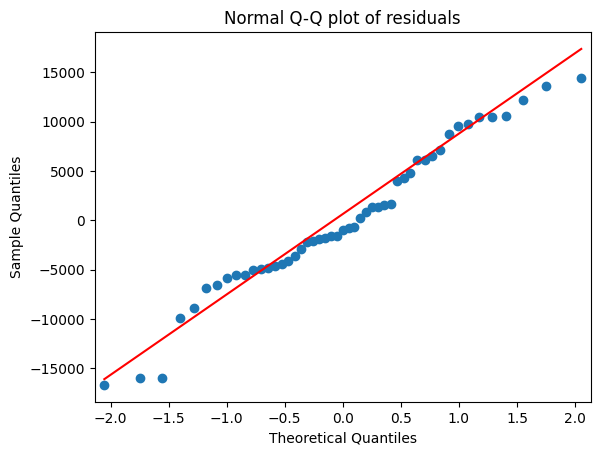

In [ ]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()


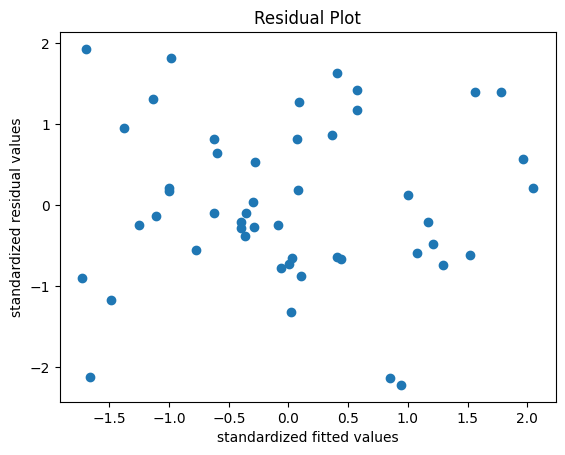

In [ ]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

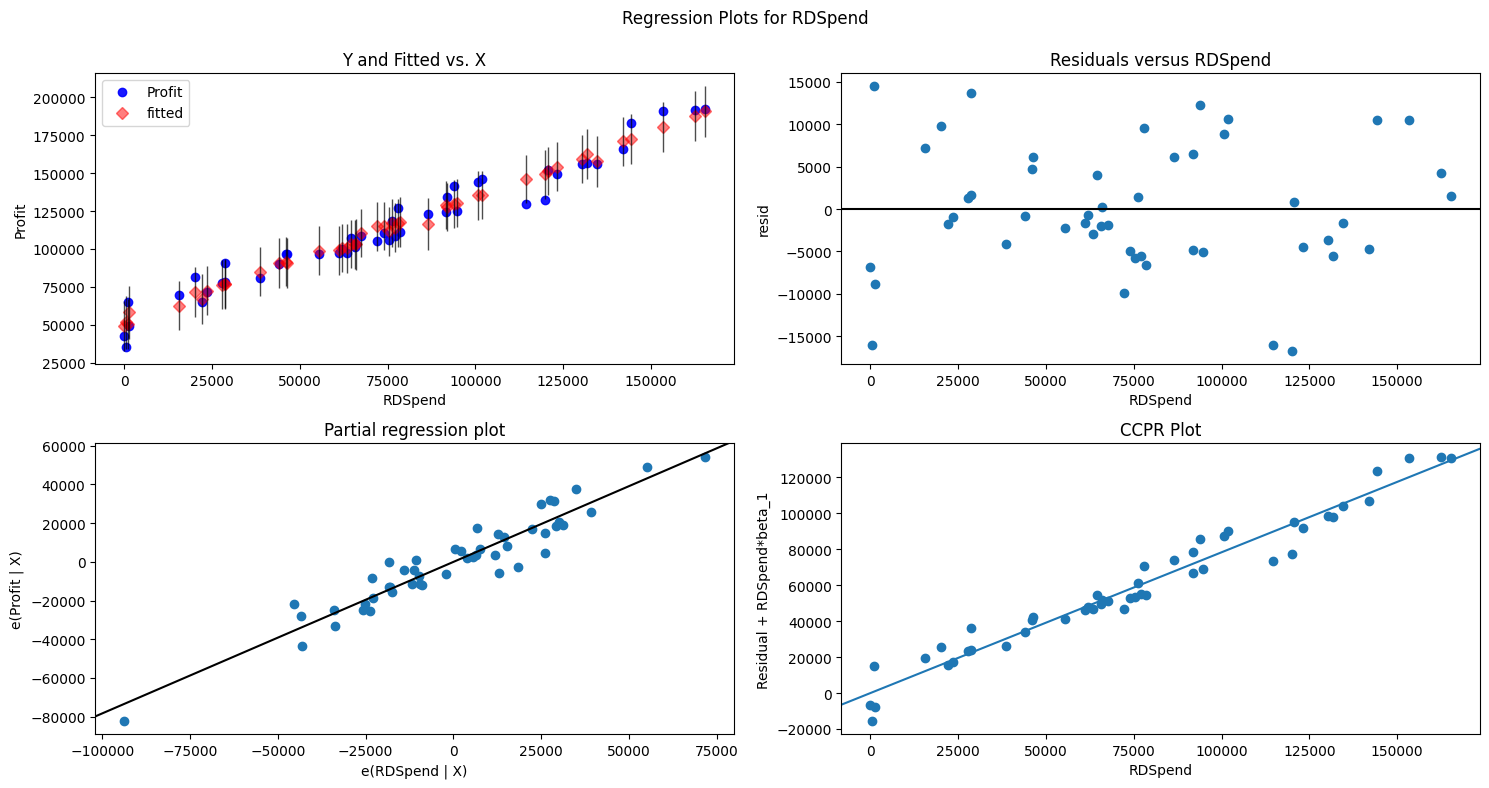

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDSpend',fig=fig)
plt.show()


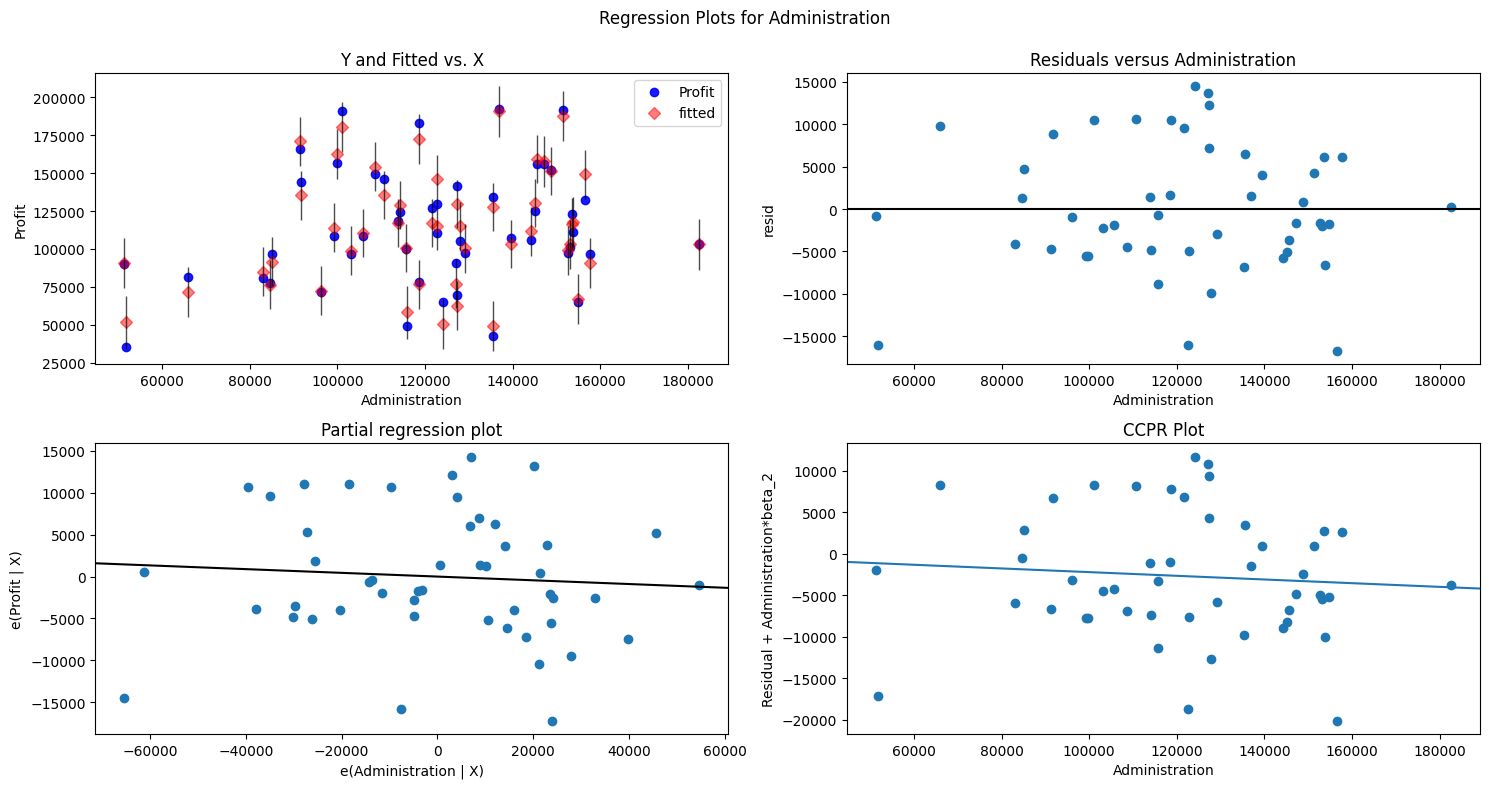

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

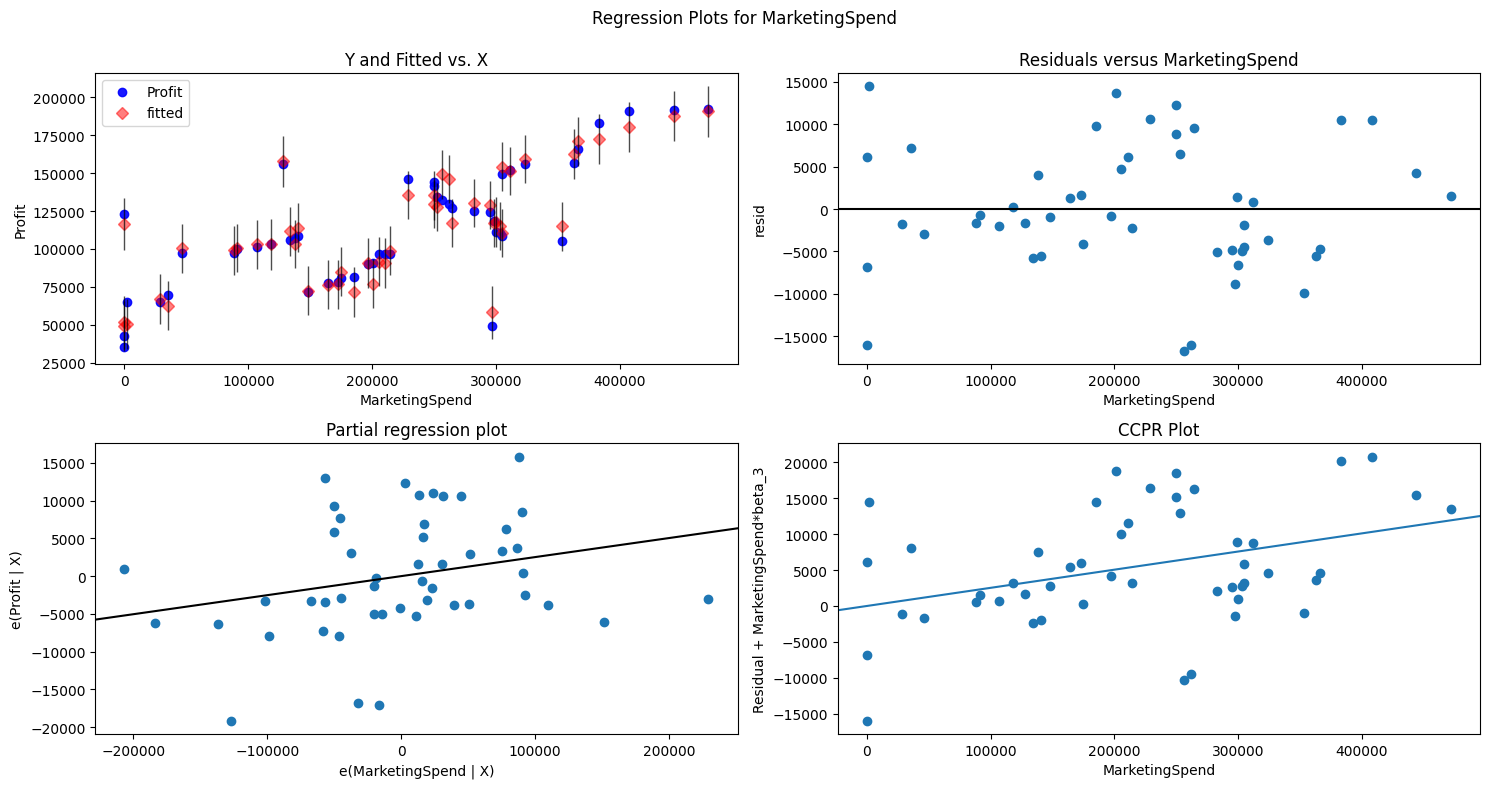

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MarketingSpend',fig=fig)
plt.show()

In [ ]:
(c,_)=model.get_influence().cooks_distance
c

array([1.66350327e-03, 1.23799116e-02, 6.50218747e-02, 4.03899998e-02,
       1.28650631e-02, 1.21058543e-02, 2.73552112e-03, 3.61057988e-03,
       2.02797815e-04, 5.30263697e-03, 2.14218192e-02, 2.37342297e-02,
       1.58363724e-02, 5.22784116e-03, 8.43989066e-02, 4.65559091e-02,
       1.07193528e-02, 5.12051798e-03, 3.22585991e-03, 4.29215716e-02,
       3.40892355e-04, 1.88659002e-02, 5.25774010e-03, 8.63061914e-04,
       9.41132587e-03, 2.64353068e-03, 7.04291169e-03, 4.71293937e-02,
       4.68589970e-05, 1.23474983e-03, 1.33416709e-04, 8.33867345e-04,
       3.47851752e-03, 6.91264848e-04, 1.96199658e-02, 6.20542092e-03,
       6.41990558e-02, 5.15924382e-04, 5.90383781e-02, 5.21168130e-03,
       6.18372420e-04, 5.54615495e-04, 2.62020740e-04, 1.76373696e-02,
       1.77776263e-03, 9.79664450e-02, 1.39422650e-01, 2.47514796e-02,
       3.92744206e-01])

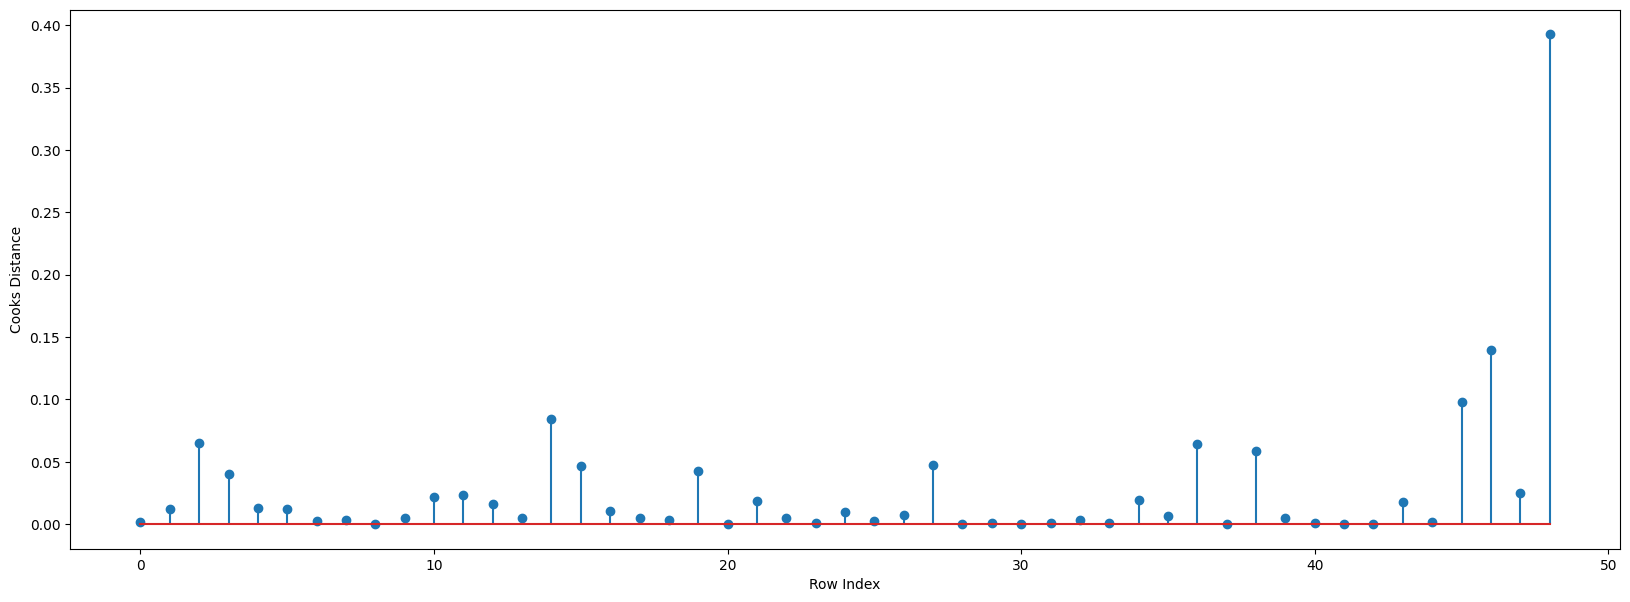

In [ ]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(Startups)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
np.argmax(c) , np.max(c)

(48, 0.39274420556321443)

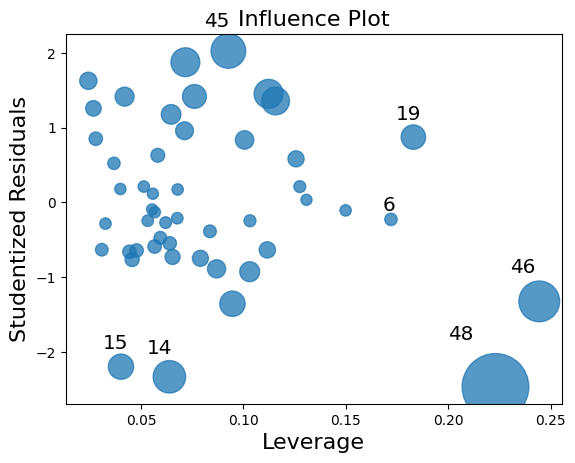

In [ ]:
influence_plot(model)
plt.show()

In [ ]:
k=Startups.shape[1]
n=Startups.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.30612244897959184

In [ ]:
Startups[Startups.index.isin([48])]

,RDSpend,Administration,MarketingSpend,Profit
48,542.05,51743.15,0.0,35673.41


In [ ]:
Startups50=Startups.drop(Startups.index[[48]],axis=0).reset_index(drop=True)
Startups50

,RDSpend,Administration,MarketingSpend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [ ]:
model2=smf.ols("Profit~RDSpend + Administration + MarketingSpend",data=Startups50).fit()

In [ ]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("Profit~RDSpend + Administration + MarketingSpend",Startups50).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        Startups50=Startups50.drop(Startups50.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        Startups50
    else:
        final_model=smf.ols("Profit~RDSpend + Administration + MarketingSpend",data=Startups50).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

In [ ]:
final_model.rsquared

0.9882757054424702

In [ ]:
Startups50

,RDSpend,Administration,MarketingSpend,Profit
0,142107.34,91391.77,366168.42,166187.94
1,131876.90,99814.71,362861.36,156991.12
2,130298.13,145530.06,323876.68,155752.60
3,120542.52,148718.95,311613.29,152211.77
4,123334.88,108679.17,304981.62,149759.96
5,91992.39,135495.07,252664.93,134307.35
6,94657.16,145077.58,282574.31,125370.37
7,91749.16,114175.79,294919.57,124266.90
8,76253.86,113867.30,298664.47,118474.03
9,67532.53,105751.03,304768.73,108733.99


In [ ]:
new_data=pd.DataFrame({'RDSpend':80000,"Administration":95000,"MarketingSpend":130000},index=[0])
new_data

,RDSpend,Administration,MarketingSpend
0,80000,95000,130000


In [ ]:
final_model.predict(new_data)

0    111451.428939
dtype: float64

In [ ]:
pred_y=final_model.predict(Startups50)
pred_y

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

In [ ]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.961316
1,Final_Model,0.988276
